#  - HOUSE PRICE PREDICTION MODEL -


## Importing Necessary Libraries:

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [46]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

## Reading The Dataset:

In [47]:
dataset=pd.read_csv('dataset2.csv')
dataset


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [48]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Checking for Missing Values 

In [49]:
dataset.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

##  Checking number of unique values for each column

In [50]:
dataset.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [51]:
#DataFrame shape
dataset.shape

(4600, 18)

In [52]:
#Random sample of 5 rows from the DataFrame
dataset.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3846,2014-07-02 00:00:00,339950.0,3.0,2.50,2390,34041,1.0,0,0,3,1840,550,1984,0,27622 195th Ave SE,Kent,WA 98042,USA
2449,2014-06-13 00:00:00,370000.0,2.0,1.00,900,4600,1.0,0,0,3,900,0,1951,1994,307 NW 87th St,Seattle,WA 98117,USA
705,2014-05-15 00:00:00,256883.0,3.0,2.50,1690,5025,2.0,0,0,3,1690,0,2003,0,833 SW 361st St,Federal Way,WA 98023,USA
1257,2014-05-23 00:00:00,554820.0,4.0,2.00,3510,12905,1.0,0,2,3,2210,1300,1965,1982,1962 SW 172nd St,Burien,WA 98166,USA
2155,2014-06-09 00:00:00,280000.0,2.0,1.75,1610,158558,1.5,0,0,2,1610,0,1948,0,7704 376th Ave SE,Snoqualmie,WA 98065,USA


In [53]:
#Summary statistics for numerical columns in the DataFrame
dataset.describe()
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [54]:
# Checking Datatypes
dataset.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [55]:
#count the number of unique elements in a column
dataset.street.value_counts()

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64

<AxesSubplot:>

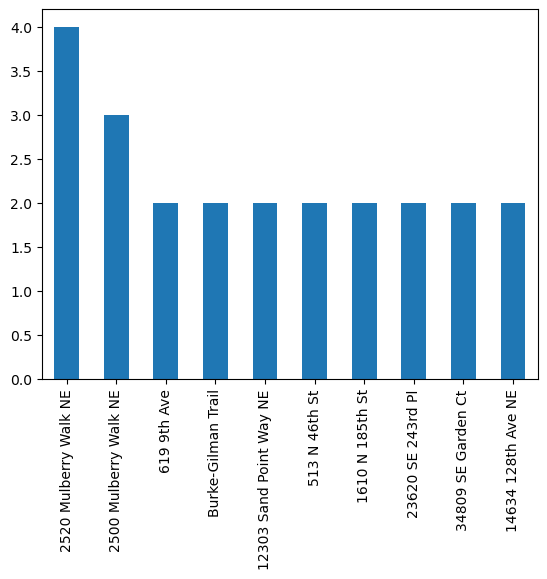

In [56]:
dataset['street'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
# plt.xlable('city')
# plt.ylable('count')

## floating plots for columns  

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

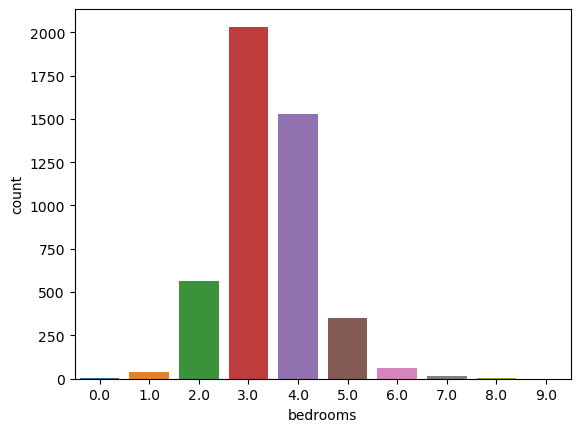

In [57]:
sns.countplot(x='bedrooms',data=dataset)

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

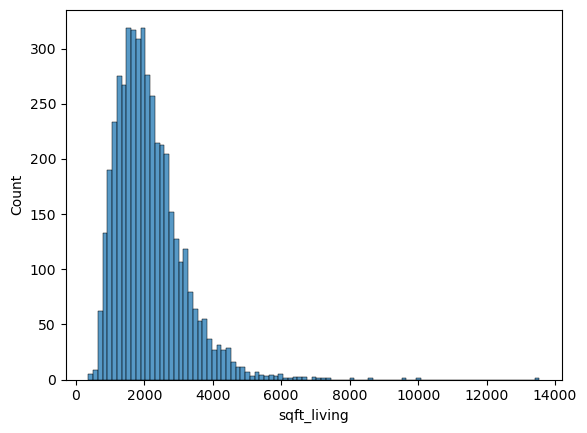

In [58]:
sns.histplot(x='sqft_living',data=dataset)

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

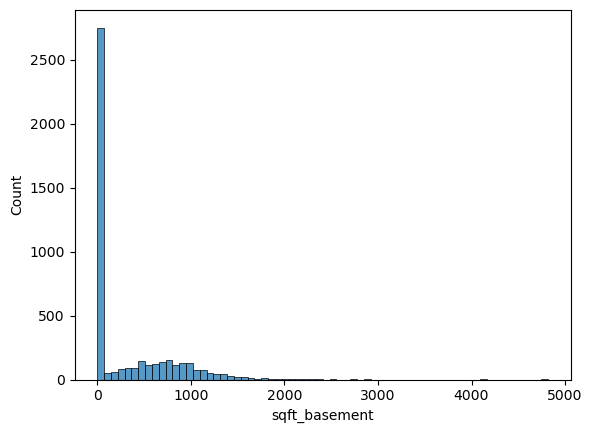

In [59]:
sns.histplot(x='sqft_basement',data=dataset)

<AxesSubplot:xlabel='sqft_above', ylabel='Count'>

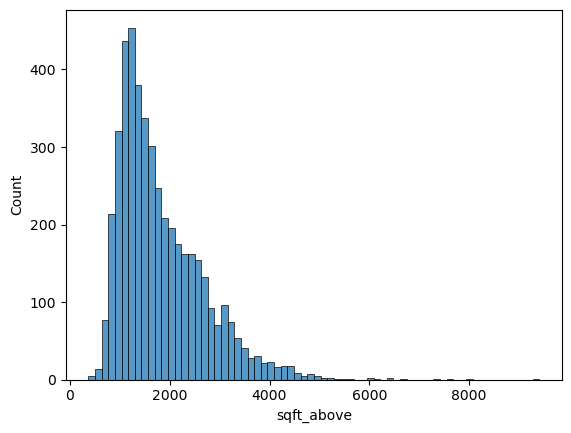

In [60]:
sns.histplot(x='sqft_above',data=dataset)

## Encoding Categorical Variables using LabelEncoder

In [61]:
le = LabelEncoder()
dataset['city']=le.fit_transform(dataset['city'])
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,36,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,35,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,18,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,3,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,31,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,35,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,3,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,32,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,35,WA 98178,USA


## Data Cleaning for Price and State ZIP Code

In [62]:
dataset.drop(np.where(dataset['price']==0)[0],axis=0,inplace=True)
dataset['statezip']=dataset['statezip'].str.replace('WA','')
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,36,98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,35,98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,18,98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,3,98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,31,98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,35,98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,3,98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,32,98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,35,98178,USA


## Data Cleaning and Dropping Unnecessary Columns

In [63]:
dataset.drop(['country','date','street'],axis=1,inplace=True)
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35,98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3,98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,32,98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,35,98178


## Data Cleaning and Price Transformation

In [64]:
dataset['price']=np.log(dataset['price'])
print(dataset['price'].skew())

0.3299813838090415


## Visualization of Key Features 

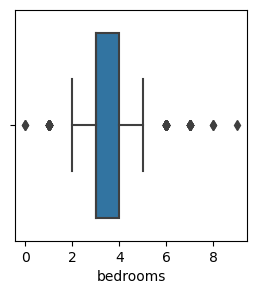

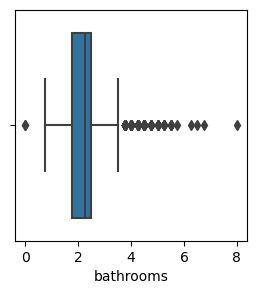

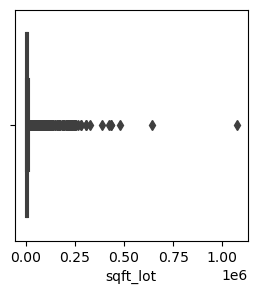

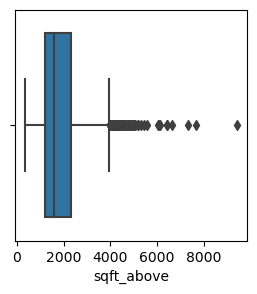

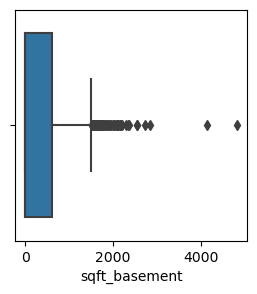

In [65]:
for i in ['bedrooms','bathrooms','sqft_lot','sqft_above','sqft_basement']:
    plt.figure(figsize=(3,3))
    sns.boxplot(x=i,data=dataset)
    plt.show()

In [66]:
#Removing outliers from key features
for i in ['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement']:
    Q1=dataset[i].quantile(0.25)
    Q3=dataset[i].quantile(0.75)
    IQR=Q3-Q1
    LOWER=Q1-(1.5*IQR)
    UPPER=Q3+(1.5*IQR)
    datasete=dataset[(dataset[i]>=LOWER)&(dataset[i]<=UPPER)]
datasete

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,12.653958,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,98133
1,14.684290,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,98119
2,12.742566,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,98042
3,12.948010,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,98008
4,13.217674,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,12.638396,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35,98133
4596,13.188775,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3,98007
4597,12.940612,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,32,98059
4598,12.222930,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,35,98178


## create a dataframe for heatmap 

[]

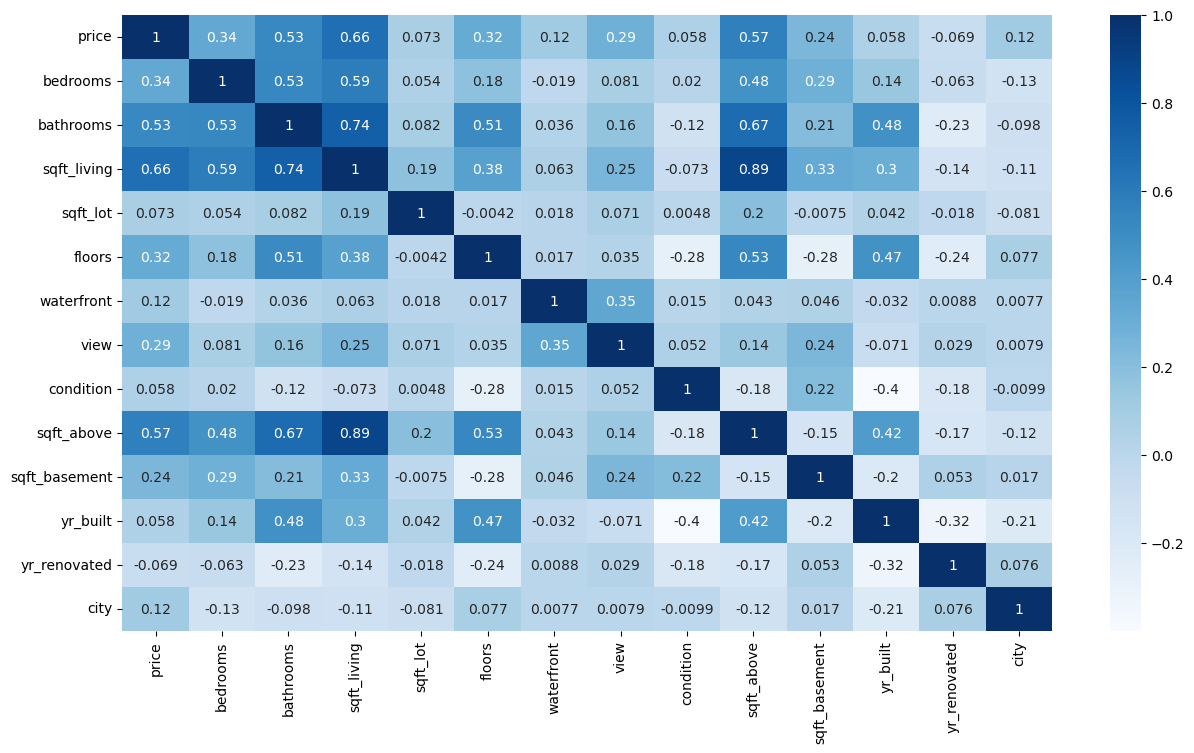

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(datasete.corr(),annot=True,cmap='Blues')
plt.plot()

 
### Modelling

In [68]:
x=datasete.drop('price',axis=1)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,98133
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,98119
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,98042
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,98008
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35,98133
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3,98007
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,32,98059
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,35,98178


In [69]:
y=datasete['price']
y

0       12.653958
1       14.684290
2       12.742566
3       12.948010
4       13.217674
          ...    
4595    12.638396
4596    13.188775
4597    12.940612
4598    12.222930
4599    12.304106
Name: price, Length: 4468, dtype: float64

## Splitting Data into Training and Testing Sets for House Price Prediction Model

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
4489,4.0,3.25,2420,4000,1.5,0,0,5,1870,550,1911,1984,35,98105
3149,5.0,3.50,3500,10155,2.0,0,0,3,2570,930,1996,0,3,98006
586,2.0,0.75,650,5360,1.0,0,0,4,650,0,1931,0,35,98133
4526,2.0,1.00,2550,21675,1.0,0,1,4,1610,940,1958,1972,10,98198
4393,3.0,1.00,1250,4800,1.0,0,0,4,1250,0,1951,1999,35,98126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,1.0,1.00,960,40946,1.0,0,0,5,960,0,1945,0,7,98014
3329,4.0,2.25,1830,6136,2.0,0,0,3,1830,0,1990,2009,18,98030
1686,4.0,2.50,3190,7869,2.0,0,2,3,3190,0,2001,0,38,98065
2658,3.0,2.50,1530,9406,1.0,0,0,3,1270,260,1993,0,32,98059


In [71]:
x_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
2510,3.0,3.00,1384,1287,2.0,0,0,3,1144,240,2006,0,35,98102
2304,3.0,1.50,1460,11407,1.0,0,0,3,1460,0,1954,2005,20,98155
714,2.0,1.00,1320,4520,1.0,0,1,3,1320,0,1912,1971,35,98116
2723,3.0,2.25,1230,1238,2.0,0,0,3,1080,150,2009,0,35,98199
4089,2.0,2.50,2290,3507,2.0,0,0,3,2290,0,2005,0,16,98029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,3.0,2.25,1750,1572,2.5,0,0,3,1470,280,2005,0,35,98102
3727,3.0,2.25,1660,5128,2.0,0,0,3,1660,0,2001,0,11,98019
4334,3.0,1.00,950,9400,1.0,0,0,4,950,0,1954,1979,3,98006
4154,3.0,2.75,2830,3496,2.0,0,0,3,2830,0,2012,1912,16,98029


In [72]:
y_train

4489    13.579788
3149    13.715690
586     12.345835
4526    12.105068
4393    12.695966
          ...    
1051    12.950032
3329    12.425208
1686    13.495298
2658    12.712890
2787    12.611538
Name: price, Length: 3574, dtype: float64

In [73]:
y_test

2510    13.262125
2304    12.850555
714     13.020452
2723    12.983101
4089    13.353475
          ...    
22      13.347106
3727    12.611538
4334    12.421184
4154    13.419501
527     12.611538
Name: price, Length: 894, dtype: float64

## Building and Training a Random Forest Model, LinearRegression, ,decision tree regression

In [74]:
modelLR=LinearRegression()
modelRFR=RandomForestRegressor(n_estimators=100,random_state=42)
tree=DecisionTreeRegressor()
lst=[modelLR,modelRFR,tree]

Model:: LinearRegression()
--------------------------------------------------------------------------------
mean absolute percentage error:: 0.021955741522535963
MAE IS:: 0.2849735021273565
Score IS 0.5573558672688199


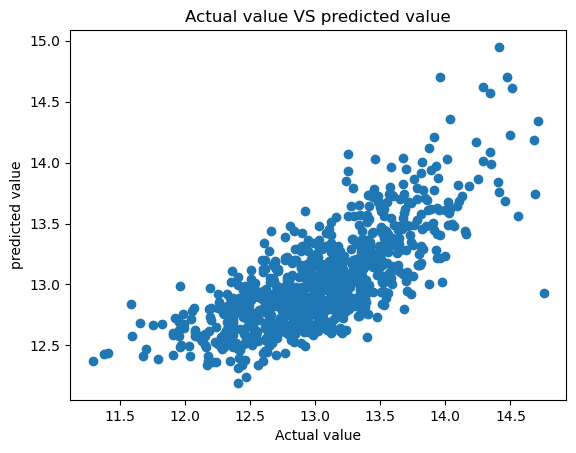

MSE IS 0.12645769919000305
--------------------------------------------------------------------------------

Model:: RandomForestRegressor(random_state=42)
--------------------------------------------------------------------------------
mean absolute percentage error:: 0.01463183951521134
MAE IS:: 0.189826658108786
Score IS 0.7495136075497357


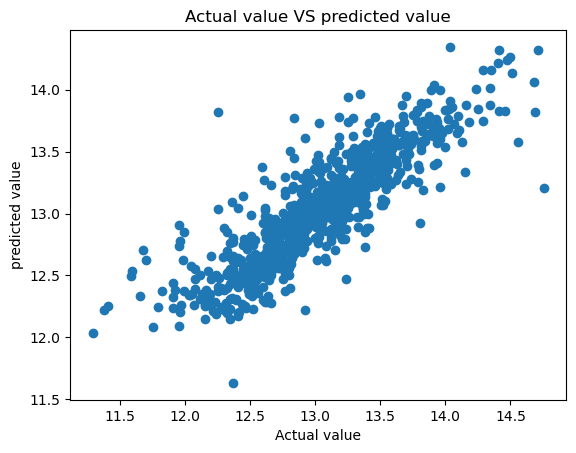

MSE IS 0.07156072005793766
--------------------------------------------------------------------------------

Model:: DecisionTreeRegressor()
--------------------------------------------------------------------------------
mean absolute percentage error:: 0.02026539439809915
MAE IS:: 0.2631727279271377
Score IS 0.48774667036977737


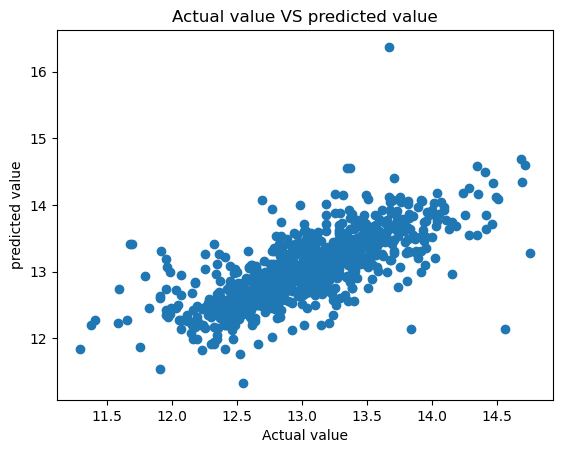

MSE IS 0.1463441457311632
--------------------------------------------------------------------------------



In [76]:
# for i in lst:
#     print("Model::",i)
#     print('-'*80)
#     i.fit(x_train,y_train)
#     y_predict=i.predict(x_test)
#     print('MAPE IS::',mean_absolute_percentage_error(y_test,y_predict))
#     print('MAE IS::',mean_absolute_error(y_test,y_predict))
#     print('Score IS',r2_score(y_test,y_predict))
#     print('MSE IS',mean_squared_error(y_test,y_predict))
#     print('-'*80)
#     print()
for i in lst:
    print("Model::",i)
    print('-'*80)
    i.fit(x_train,y_train)
    y_predict=i.predict(x_test)
    print('mean absolute percentage error::',mean_absolute_percentage_error(y_test,y_predict))
    print('MAE IS::',mean_absolute_error(y_test,y_predict))
    print('Score IS',r2_score(y_test,y_predict))
    plt.scatter(y_test,y_predict)
    plt.xlabel("Actual value")
    plt.ylabel("predicted value")
    plt.title("Actual value VS predicted value")
    plt.show()
    print('MSE IS',mean_squared_error(y_test,y_predict))
    print('-'*80)
    print()